In [1]:
import torch
import torch.nn as nn
import os
from datasets import data_merge
from torch.utils.data import Dataset, DataLoader
from transformers import *
from utils import *
from configs import parse_args
import time
import numpy as np
import random
from loss import *
from datasets.data_fetchers import DataFetcher
from torch.utils.tensorboard import SummaryWriter

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pandas as pd
import cv2
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import math
import os 
from glob import glob

Loading MSU_MFSD, number: 120


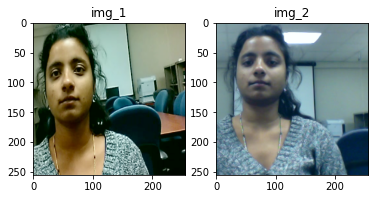

In [13]:
data_bank = data_merge('/root/autodl-tmp/')
datasets = ["OULU", "CASIA_MFSD", "Replay_attack", "MSU_MFSD"]

idx = 3
test_data_dic = data_bank.get_single_dataset(data_name=datasets[idx], mode='Train')
test_data_loader = DataLoader(test_data_dic, batch_size=2, shuffle=False, num_workers=0)

sample = next(iter(test_data_loader))
image_x, label, UUID, map_x = sample['image_x'], sample['label'], sample['UUID'], sample['map_x']

img_1, img_2 = Image.fromarray(cv2.cvtColor(image_x[0].numpy().astype(np.uint8), cv2.COLOR_RGB2BGR)), Image.fromarray(cv2.cvtColor(image_x[1].numpy().astype(np.uint8), cv2.COLOR_RGB2BGR))

# 显示原始图片和规范化后的图片
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_1)
ax[0].set_title('img_1')
ax[1].imshow(img_2)
ax[1].set_title('img_2')

# crop_img = crop_face_from_scene(source_img, 1.3)
# print(crop_img.shape)
out_dir = os.path.join('./', 'images', datasets[idx])
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
img_1.save(os.path.join(out_dir,'img_1.jpg'),'JPEG')
img_2.save(os.path.join(out_dir, 'img_2.jpg'),'JPEG')


